# **Consumer Complaint Resolution -- Predicting Whether Consumer will dispute or not**

In [0]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

## **Exploratory Data Analysis**

In [0]:
!wget 'https://www.dropbox.com/s/542c7lq76uyrdr3/Consumer_Complaints_train.csv'

In [0]:
df= pd.read_csv('/content/Consumer_Complaints_train.csv')

In [4]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2014-05-15,Credit card,NaN,Billing statement,NaN,NaN,NaN,Wells Fargo & Company,MI,48342,Older American,NaN,Web,2014-05-16,Closed with explanation,Yes,No,856103
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",NaN,NaN,NaN,Santander Bank US,PA,18042,NaN,NaN,Referral,2014-09-24,Closed,Yes,No,1034666
2,2014-03-13,Credit reporting,NaN,Incorrect information on credit report,Account status,NaN,NaN,Equifax,CA,92427,NaN,NaN,Referral,2014-04-03,Closed with non-monetary relief,Yes,No,756363
3,2015-07-17,Credit card,NaN,Billing statement,NaN,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,1474177
4,2014-11-20,Credit card,NaN,Transaction issue,NaN,NaN,NaN,Bank of America,MA,02127,NaN,NaN,Web,2014-11-28,Closed with explanation,Yes,No,1132572


In [5]:
df.shape

(478421, 18)

In [6]:
df.isnull().sum()/df.shape[0]*100

Date received                    0.000000
Product                          0.000000
Sub-product                     28.943755
Issue                            0.000000
Sub-issue                       61.164748
Consumer complaint narrative    84.303783
Company public response         81.106181
Company                          0.000000
State                            0.802431
ZIP code                         0.804313
Tags                            85.952540
Consumer consent provided?      71.680382
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64

In [0]:
df= df[['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company',
        'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date sent to company', 'Company response to consumer', 'Timely response?', 'Consumer disputed?']]

In [8]:
df['Date received'].min(), df['Date received'].max()

('2011-12-01', '2016-09-23')

In [0]:
df['Date received']= pd.to_datetime(df['Date received'])
df['Date sent to company']= pd.to_datetime(df['Date received'])

In [10]:
df['Product'].value_counts(dropna=False)

Mortgage                   156175
Debt collection             86544
Credit reporting            81115
Credit card                 57358
Bank account or service     54403
Consumer Loan               18599
Student loan                14918
Money transfers              3349
Payday loan                  3219
Prepaid card                 2226
Other financial service       507
Virtual currency                8
Name: Product, dtype: int64

In [11]:
df['Issue'].value_counts().shape

(95,)

In [12]:
df['Company'].value_counts(dropna=False).shape

(3276,)

In [13]:
df['State'].value_counts(dropna=False).shape

(63,)

In [14]:
df['Submitted via'].value_counts(dropna=False)

Web            313916
Referral        91352
Phone           34417
Postal mail     31448
Fax              7032
Email             256
Name: Submitted via, dtype: int64

In [15]:
df['Company response to consumer'].value_counts(dropna=False)

Closed with explanation            354310
Closed with non-monetary relief     61491
Closed with monetary relief         32925
Closed without relief               14145
Closed                              11365
Closed with relief                   4184
Untimely response                       1
Name: Company response to consumer, dtype: int64

In [16]:
df['Timely response?'].value_counts(dropna=False)

Yes    470277
No       8144
Name: Timely response?, dtype: int64

In [17]:
df['Consumer disputed?'].value_counts()

No     376990
Yes    101431
Name: Consumer disputed?, dtype: int64

In [0]:
company_complaints_count= df['Company'].value_counts()
df['Company_complaints_count']= df['Company'].apply(lambda x: company_complaints_count[x])

In [0]:
company= pd.crosstab(df['Company'], df['Consumer disputed?'])

In [20]:
company.head()

Consumer disputed?,No,Yes
Company,,
"1st 2nd Mortgage Company Of NJ, Inc.",1,0
1st Alliance Lending,10,2
"1st Capital Finance of South Carolina, Inc.",1,0
"1st Capital Mortgage, LLC",0,1
1st Franklin Financial Corporation,24,7


In [0]:
company['dipute rate']= company.Yes/ (company.Yes + company.No)

In [0]:
company['company']= company.index

In [0]:
company['complaints_count']= company['company'].apply(lambda x: company_complaints_count[x])

In [0]:
company= company.sort_values('complaints_count', ascending=False)

In [25]:
company.head(10)

Consumer disputed?,No,Yes,dipute rate,company,complaints_count
Company,,,,,
Bank of America,35687,10649,0.229821,Bank of America,46336
Wells Fargo & Company,27100,8353,0.235608,Wells Fargo & Company,35453
JPMorgan Chase & Co.,22143,6709,0.232532,JPMorgan Chase & Co.,28852
Equifax,22285,6547,0.227074,Equifax,28832
Experian,23192,3602,0.134433,Experian,26794
"TransUnion Intermediate Holdings, Inc.",18872,3636,0.161543,"TransUnion Intermediate Holdings, Inc.",22508
Citibank,17573,4727,0.211973,Citibank,22300
Ocwen,13157,4318,0.247096,Ocwen,17475
Capital One,10819,2577,0.192371,Capital One,13396


In [0]:
temp1= pd.crosstab(df['Product'], df['Consumer disputed?'])

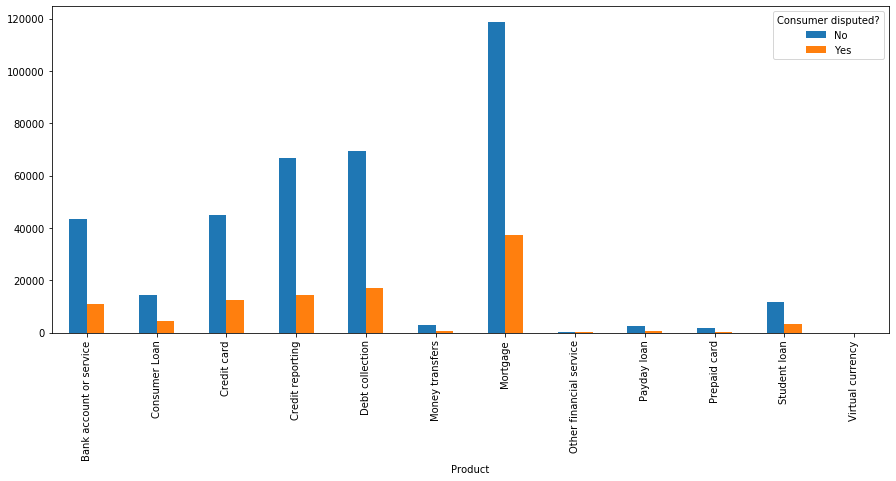

In [27]:
temp1.plot(kind='bar', figsize=(15,6))

In [0]:
temp2= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])

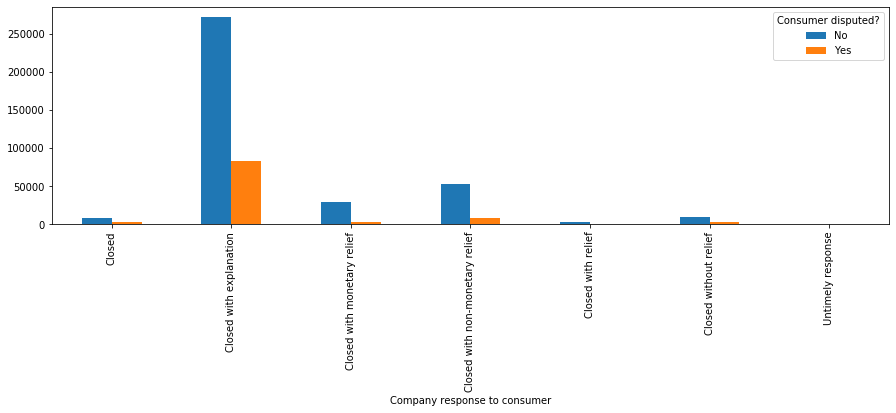

In [29]:
temp2.plot(kind='bar', figsize=(15,4))

In [0]:
temp3= pd.crosstab(df['Consumer consent provided?'], df['Consumer disputed?'])

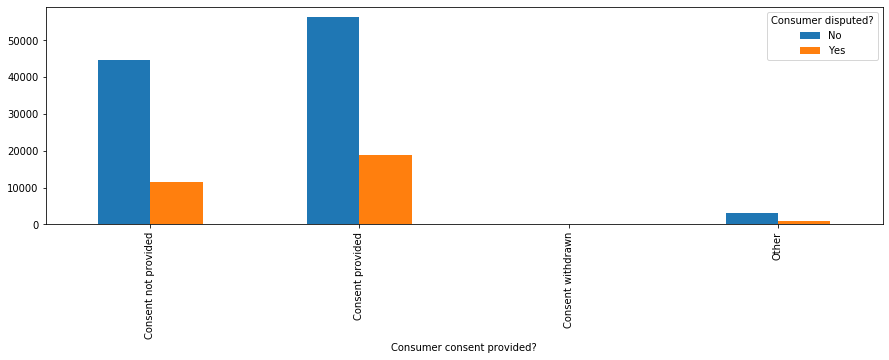

In [31]:
temp3.plot(kind='bar', figsize=(15,4))

 **Handling Missing Values**

In [32]:
df.isnull().sum()/df.shape[0]*100

Date received                    0.000000
Product                          0.000000
Sub-product                     28.943755
Issue                            0.000000
Sub-issue                       61.164748
Consumer complaint narrative    84.303783
Company public response         81.106181
Company                          0.000000
State                            0.802431
ZIP code                         0.804313
Tags                            85.952540
Consumer consent provided?      71.680382
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Company_complaints_count         0.000000
dtype: float64

In [0]:
df['Sub-product'].fillna('Not Provided', inplace=True)
df['Sub-issue'].fillna('Not Provided', inplace=True)
df['Consumer complaint narrative'].fillna('None or not Provided', inplace=True)
df['Company public response'].fillna('Company chooses not to provide', inplace=True)
df['Issue'].fillna('Other', inplace=True)
df['Tags'].fillna('Unknown', inplace=True)
df['Submitted via'].fillna('Other', inplace=True)

df['Consumer consent provided?'].fillna('Consent not provided', inplace=True)
df['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: 'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [34]:
pd.isnull(df['State']).shape, pd.isnull(df['ZIP code']).shape

((478421,), (478421,))

In [0]:
#Filling missing state value using valid zipcode.
!pip install pyzipcode3
from pyzipcode import ZipCodeDatabase
zip= ZipCodeDatabase()
for i in df[pd.isnull(df['State']) & pd.notnull(df['ZIP code'])].index:
  try:
    df['State'][i]= str(zip[df['ZIP code'][i]].state)
  except:
    continue

In [37]:
df[pd.isnull(df['State']) & pd.isnull(df['ZIP code'])].shape #We see that still 3839 States & 18 ZIP codes does have any value.

(3839, 18)

In [0]:
df['State'].fillna('Not provided', inplace=True)
df['ZIP code'].fillna('Not provided', inplace=True)

In [39]:
df['Consumer consent provided?'].value_counts(dropna=False)

Consent not provided    403326
Consent provided         75095
Name: Consumer consent provided?, dtype: int64

In [40]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Company_complaints_count
0,2014-05-15,Credit card,Not Provided,Billing statement,Not Provided,None or not Provided,Company chooses not to provide,Wells Fargo & Company,MI,48342,Older American,Consent not provided,Web,2014-05-15,Closed with explanation,Yes,No,35453
1,2014-09-18,Bank account or service,(CD) Certificate of deposit,"Making/receiving payments, sending money",Not Provided,None or not Provided,Company chooses not to provide,Santander Bank US,PA,18042,Unknown,Consent not provided,Referral,2014-09-18,Closed,Yes,No,1633
2,2014-03-13,Credit reporting,Not Provided,Incorrect information on credit report,Account status,None or not Provided,Company chooses not to provide,Equifax,CA,92427,Unknown,Consent not provided,Referral,2014-03-13,Closed with non-monetary relief,Yes,No,28832
3,2015-07-17,Credit card,Not Provided,Billing statement,Not Provided,"My credit card statement from US Bank, XXXX. X...",Company chooses not to provide a public response,U.S. Bancorp,GA,305XX,Older American,Consent provided,Web,2015-07-17,Closed with monetary relief,Yes,No,8201
4,2014-11-20,Credit card,Not Provided,Transaction issue,Not Provided,None or not Provided,Company chooses not to provide,Bank of America,MA,02127,Unknown,Consent not provided,Web,2014-11-20,Closed with explanation,Yes,No,46336


## **Feature Engineering**

In [0]:
replace= {'Yes': True, 'No':False}
df['Consumer disputed?']= df['Consumer disputed?'].apply(lambda x: replace[x])

In [0]:
#Creating a DataFrame including all the features in the model.
df_model= DataFrame()

In [0]:
#Creating Consumer consent boolean feature.
replace1= {'Consent provided': True, 'Consent not provided': False}
df_model['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

In [0]:
#Creating the no. of complaints from each company as a feature.
company_complaints_count= df['Company'].value_counts()
df_model['Company complaints count']= df['Company'].apply(lambda x: company_complaints_count[x])

In [45]:
df.dtypes

Date received                   datetime64[ns]
Product                                 object
Sub-product                             object
Issue                                   object
Sub-issue                               object
Consumer complaint narrative            object
Company public response                 object
Company                                 object
State                                   object
ZIP code                                object
Tags                                    object
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer            object
Timely response?                        object
Consumer disputed?                        bool
Company_complaints_count                 int64
dtype: object

In [0]:
features_for_model= ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company public response', 'Tags', 'Company response to consumer', 'State']

for name in features_for_model:
  repl={}
  i=0
  for value in df[name].unique():
    repl[value]=i
    i+=1

  df[name]= df[name].apply(lambda x: repl[x])
  df_model[name]= df[name].astype('category')

In [0]:
#Process time refers to days between the date CFPB received complaints and the date when complaints were sent to company on behalf of consumer.
df['Process time']= (df['Date sent to company'] - df['Date received']).astype('timedelta64[D]').astype(int)
df_model= pd.concat([df_model, df['Process time']], axis=1)

In [0]:
#Creating Timely response Boolean feature.
df['Timely response?']= df['Timely response?'].apply(lambda x: replace[x])
df_model= pd.concat([df_model, df['Timely response?']], axis=1)

In [0]:
#Create features about Complaint submitted time.
df_model['Date received year']= df['Date received'].apply(lambda x: x.year)
df_model['Date received month']= df['Date received'].apply(lambda x: x.month)
df_model['Date received day']= df['Date received'].apply(lambda x: x.day)

In [50]:
df_model.head()

,Consumer consent provided?,Company complaints count,Product,Sub-product,Issue,Sub-issue,Company public response,Tags,Company response to consumer,State,Process time,Timely response?,Date received year,Date received month,Date received day
0,False,35453,0,0,0,0,0,0,0,0,0,True,2014,5,15
1,False,1633,1,1,1,0,0,1,1,1,0,True,2014,9,18
2,False,28832,2,0,2,1,0,1,2,2,0,True,2014,3,13
3,True,8201,0,0,0,0,1,0,3,3,0,True,2015,7,17
4,False,46336,0,0,3,0,0,1,0,4,0,True,2014,11,20


## **Modelling**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
import sklearn.metrics as skm
from matplotlib import pyplot as plt

Modelling with Non-complaint narrative text features 

In [0]:
x= df_model.values
y= df['Consumer disputed?'].values

In [0]:
X_train, X_test, Y_train, Y_test= train_test_split(x, y, test_size=0.20, random_state=67)

In [0]:
scaler= StandardScaler()
scaler.fit(X_train)
X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

**Logistic Regression**

In [55]:
lr= LogisticRegression(class_weight='auto')
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
lr.score(X_test, Y_test)

0.787594711814809

In [0]:
v_probs= lr.predict_proba(X_test)[:,1]

In [0]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(v_probs, y_test, title, xlabel, ylabel):
    # ROC
    fig = plt.figure(figsize = (8,6))
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)
    
    import sklearn.metrics as skm
    auc = skm.roc_auc_score(y_test, v_probs)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, 'k--')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    fig.savefig(title+'.png')

In [59]:
roc_auc_score(Y_test, v_probs)

0.5634066621416431

In [60]:
v_probs.shape

(95685,)

**Decision Tree**

In [61]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced', max_features=1, verbose=1)
rfc.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  2.3min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [62]:
rfc.score(X_test, Y_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   13.3s finished


0.7850237759314417

In [63]:
pd.crosstab(Y_test, rfc.predict(X_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   13.3s finished


col_0,False,True
row_0,,
False,73505,1856
True,18714,1610


In [64]:
skm.roc_auc_score(Y_test, rfc.predict_proba(X_test)[:,1])

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   13.3s finished


0.612381356382569

In [65]:
skm.recall_score(Y_test, rfc.predict(X_test))

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.6s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   10.6s
[Parallel(n_jobs=4)]: Done 1000 out of 1000 | elapsed:   13.3s finished


0.07921668962802599

In [0]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

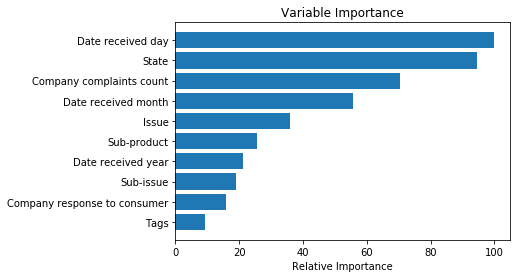

In [69]:
plot_importance(rfc, df_model, max_features=10)